<a href="https://colab.research.google.com/github/Sonali-Kotni57/Deep-Learning-Lab/blob/main/Experiment_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment-1 CNN**

In [9]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils
import tensorflow as tf

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


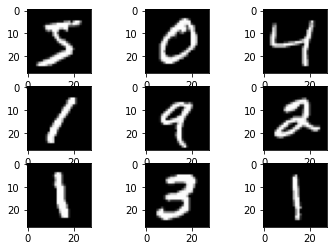

In [10]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [11]:
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))


In [12]:
trainy = np_utils.to_categorical(trainy)
testy = np_utils.to_categorical(testy)

In [13]:
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')

trainX_norm = trainX_norm/255.0 
testX_norm = testX_norm/255.0

In [14]:
from keras import layers
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
#model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(trainX_norm,trainy, batch_size=128, epochs=10, validation_data=(testX_norm,testy))

Epoch 1/10
469/469 [==============================] - 43s 62ms/step - loss: 0.4480 - accuracy: 0.8707 - val_loss: 0.0891 - val_accuracy: 0.9731
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0758 - accuracy: 0.9779 - val_loss: 0.0591 - val_accuracy: 0.9810
Epoch 3/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0467 - accuracy: 0.9864 - val_loss: 0.0635 - val_accuracy: 0.9784
Epoch 4/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0408 - val_accuracy: 0.9857
Epoch 5/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 6/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0446 - val_accuracy: 0.9855
Epoch 7/10
469/469 [==============================] - 29s 61ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.0419 - val_accuracy:

In [17]:
score = model.evaluate(testX_norm,testy, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.04502712935209274
Test accuracy: 0.9866999983787537


In [18]:
prediction=model.predict(testX_norm)

In [19]:
print(np.argmax(prediction[1]))

2


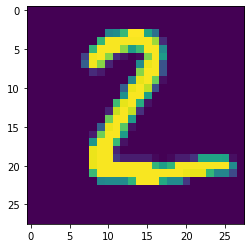

In [21]:
pyplot.imshow(  tf.squeeze(testX[1])  )

pyplot.show()